<a href="https://colab.research.google.com/github/han-juyoung/Aimers_Lectures/blob/main/Image_PIL_%EC%95%8C%EC%95%84%EB%B3%B4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [이론] PIL 알아보기

## 목차
#### 1. PIL(Pillow) 소개

#### 2. PIL 시작하기

#### 3. 이미지 형태 변환

#### 4. 이미지 색성 변환

#### 5. 필터 변환

## 1. PIL(Pillow) 소개

이번에는 이론 강의에서 소개했던 전통적인 이미지 처리를 위한 라이브러리의 사용법을 알아보도록 하겠습니다. Python에서 자주 사용하는 이미지 처리 라이브러리는 **PIL(Python Imaging Library)** 라는 것이 있습니다. 하지만 기존 PIL 라이브러리 개발은 2011년에 중단되었고, 오픈 소스였던 해당 프로젝트를 복제(fork)한 **Pillow** 라는 이름의 프로젝트가 현재까지 개발되고 있습니다.


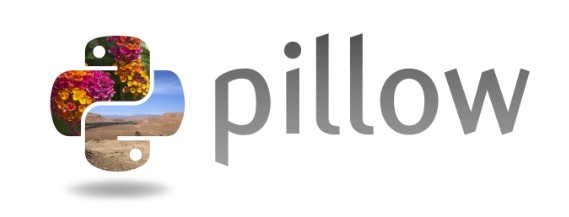

이 Pillow를 사용하여 이미지를 불러오고 처리하는 방법을 하나씩 설명하도록 하겠습니다.

## 2. PIL 시작하기

먼저 Pillow는 PIP를 이용하여 설치할 수 있습니다.
```shell
python3 -m pip install Pillow
```

본 주피터 노트북 환경에서는 이미 Pillow가 설치되어 있기 때문에 설치 과정은 생략하도록 하겠습니다. 다음으로 Pillow 라이브러리는 아래와 같이 불러옵니다.

In [ ]:
from PIL import Image

보시다시피 PIL 라이브러리에서 `Image`라는 이름만 가져온 것을 알 수 있습니다. 이는 Pillow 사용에 핵심이 되는 `Image` 모듈로, 기본적인 이미지 불러오기부터 다양한 처리 기법을 제공하는 모듈입니다. 제일 먼저 이미지를 불러오기 위해서는 `Image` 모듈에서 **`open` 함수**를 사용합니다. 사용할 이미지는 이미지와 영상 처리 분야를 처음 배울 때 예제 이미지로 유명한 [레나 포르센](https://en.wikipedia.org/wiki/Lena_Fors%C3%A9n)의 사진입니다. 해당 사진만을 따로 [**레나(Lenna)**](https://en.wikipedia.org/wiki/Lenna)라고 부르기도 합니다. 프로그래밍을 처음 배울 때 항상 해보는 **Hello, World** 출력해보기 같은 위상이라고 생각하시면 됩니다.

<center><img src="./img/Lenna.png" width=250px></center>

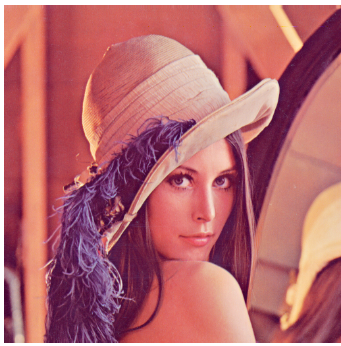

`open` 함수에는 열 파일이 존재하는 경로명을 넣어주면 됩니다. 현재 레나 사진은 본 주피터 노트북이 존재하는 경로에 `Lenna.png`라는 이름으로 저장되어 있으므로 아래와 같이 불러와 주면 됩니다.

In [ ]:
img = Image.open("Lenna.png")

이렇게 불러오면 `img`라는 변수에 Pillow의 `Image` 클래스의 객체가 저장됩니다. 이 "`Image` 클래스"는 앞서 언급한 "`Image` 모듈"과는 **이름만 같고 서로 다른 존재**라는 점에 유의하세요. 앞으로는 모두 `Image` **클래스**에 구현된 메소드에 대해 배울 것입니다.

불러온 이미지를 코드를 통해 시각화하고자 한다면 `Image` 클래스의 `show` 메소드를 사용하면 됩니다. 하지만 이 메소드는 코드를 실행하는 운영체제에서 이미지를 열기 위한 기본 프로그램을 찾아 열기 때문에 주피터 노트북 환경에서는 사용할 수 없습니다. 따라서 여기서는 matplotlib을 이용하여 이미지를 띄워보도록 하겠습니다.

In [ ]:
from matplotlib.pyplot import imshow

imshow(img)

불러온 이미지의 사이즈는 **`size` 속성**(attribute)을 통해 확인할 수 있습니다. 이미지가 컬러인지 흑백인지 여부는 **`mode` 속성**에 저장되어 있습니다.

In [ ]:
print("Size: {}, Mode: {}".format(img.size, img.mode))

레나 사진의 크기는 가로 세로 각각 512개의 픽셀로 이루어져 있으며, 각 픽셀은 RGB 채널을 가진다는 사실을 확인할 수 있습니다.

## 3. 이미지 형태 변환

다음으로 이미지의 형태를 변환하는 함수들을 알아보도록 하겠습니다. 형태를 변환한다고 하면 일반적으로 **잘라내기(crop)**, **회전(rotate)**, **크기 변경(resize)** 등이 있습니다. 이들 모두 `Image` 클래스에 구현된 메소드를 통해 손쉽게 수행할 수 있습니다.

### 3-1. 이미지 잘라내기 (Crop)

이미지 잘라내기(crop)은 **전체 이미지 안에서 특정 영역만 잘라내는 작업**을 의미합니다. Pillow에서는 `Image` 클래스의 `crop` 메소드를 통해 쉽게 수행할 수 있습니다. `crop` 메소드에는 이미지 내의 4개의 좌표를 튜플(tuple) 형태로 넣어주면 됩니다. 이 튜플을 만들어주기 위해선 먼저 이미지 내의 좌표계가 어떻게 구성되는지를 이해할 필요가 있습니다.

**이미지 내의 좌표계**는 일반적으로 익숙한 x축, y축 좌표계와는 다소 다르게 구성됩니다. 먼저 좌표계의 원점에 해당하는 $(0, 0)$은 이미지 좌측 최상단 픽셀과 대응합니다. x축과 y축은 각각 가로 방향과 세로 방향인 것은 동일합니다. 좌표값은 픽셀이 하나당 1에 해당합니다. 즉 원점 기준으로 가로로 100픽셀 떨어지고, 세로로 150픽셀 떨어진 지점에 존재하는 픽셀의 좌표는 $(100, 150)$이 됩니다.

<center><img src="./img/image_coordinate.png" width=400px></center>

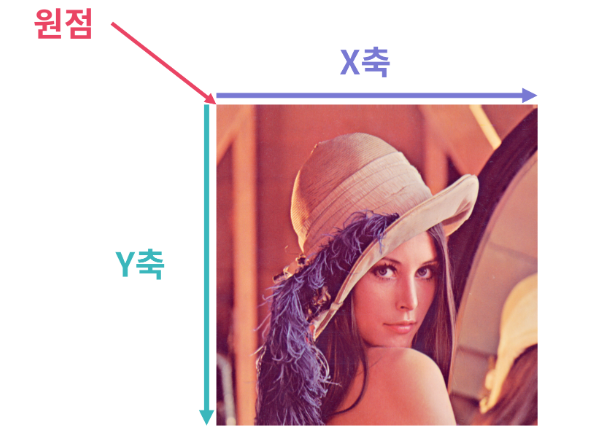

`crop` 메소드는 잘라낼 영역의 좌측 상단 좌표$(x_1, y_1)$과 우측 하단 좌표$(x_2, y_2)$값 4개를 튜플로 요구합니다. 즉, `crop` 메소드는 아래와 같은 형태로 사용해야 합니다.
```python
img.crop((x1, y1, x2, y2))
```

아래 그림은 잘라내기 위한 영역이 노란색 상자일 경우의 예시를 보여주고 있습니다.

<center><img src="./img/crop_coordinate.png" width=500px></center>

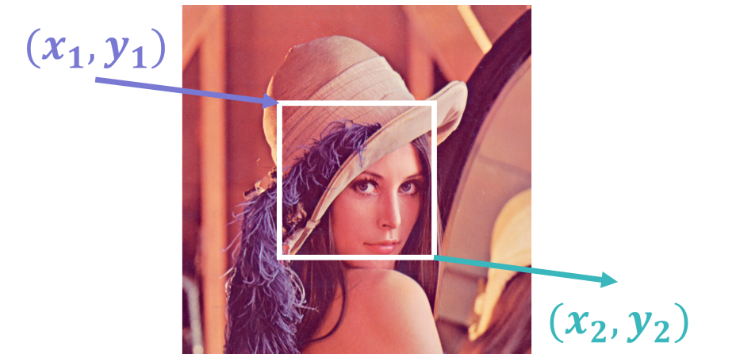

좌측 상단의 좌표를 $(200, 200)$으로 잡고, 우측 하단의 좌표를 $(400, 400)$으로 잡는다면 아래와 같은 결과가 나오게 됩니다.

In [ ]:
imshow(img.crop((200, 200, 400, 400)))

### 3-2. 이미지 회전하기

이미지 회전(rotate)은 이미지 자체를 **시계 방향 혹은 반시계 방향으로 일정 각도만큼 돌리는 것**을 의미합니다. 이를 위한 메소드에는 `rotate`가 있습니다. 이 메소드는 회전하고자 하는 각도를 넣어주면 됩니다. 그러면 해당 각도만큼 반시계 방향으로 회전한 결과를 내놓게 됩니다.

In [ ]:
imshow(img.rotate(60))

위의 결과를 확인해보면 60도만큼 반시계로 돌아간 것은 알겠는데 사진이 잘려보이는 것을 알 수 있습니다. 이는 쉽게 생각하면 정사각형에서 가로, 세로 길이보다 대각선 길이가 더 길기 때문에 발생하는 현상입니다. 잘림 없이 전체 이미지를 확인하고 싶다면 `rotate` 메소드에 `expand=True` 옵션을 추가하면 됩니다.

In [ ]:
imshow(img.rotate(60, expand=True))

그러면 나타나는 좌표축의 눈금이 기존의 500까지가 아닌 600 너머까지 확장되어 이미지 전체가 그려지고 있는 것을 확인할 수 있습니다.

그렇다면 시계 방향으로는 어떻게 회전시킬 수 있을까요? 이미 잘 아시겠지만 시계 방향으로 돌리고 싶은 각도만큼 360도에서 빼서 반시계 방향으로 돌린다면 동일한 효과를 얻어낼 수 있을 것입니다. 즉 시계 방향으로 90도 돌리고자 한다면 반시계 방향으로 270도를 돌리면 될 것입니다.

In [ ]:
imshow(img.rotate(270))

### 3-3. 크기와 비율 변환

이미지에서 크기 변환은 가로, 세로의 길이를 변화시키는 작업입니다. 비율 변환은 기존의 이미지가 가지고 있던 가로와 세로 길이의 비율이 변화하는 변환 작업입니다. 둘을 엄밀하게 나누지 않고 모두 resize 혹은 rescale로 부르며 Pillow에서는 모두 `resize` 메소드를 통해 수행할 수 있습니다. `resize` 메소드에는 바꾸고자 하는 가로와 세로의 픽셀 길이를 튜플로 넣어주면 됩니다.

먼저 우리가 현재 불러온 레나 사진의 경우 가로, 세로 길이가 각각 512 픽셀로 동일한 1:1 비율의 이미지입니다. 아래 코드는 비율은 유지한 채 가로, 세로 128 픽셀로 줄이는 작업을 수행합니다.

In [ ]:
img_resized = img.resize((128, 128))
print("새로운 이미지 사이즈:", img_resized.size)
imshow(img_resized)

좌표축의 눈금이 500 정도에서 120 정도로 줄어든 것을 확인할 수 있습니다. 더불어 픽셀 수를 줄였기 때문에 이미지의 선명도 또한 떨어진 것을 확인할 수 있습니다.

다음은 비율을 무시한 채 원하는 크기로 바꾸는 작업입니다. 별다른 것이 있는 것은 아니고 단지 가로와 세로 길이에 해당하는 픽셀 수의 비율을 다르게 설정하기만 하면 됩니다. 아래 코드는 가로 128픽셀, 세로 256 픽셀로 변경합니다.

In [ ]:
img_resized = img.resize((128, 256))
print("새로운 이미지 사이즈:", img_resized.size)
imshow(img_resized)

기존 사진이 비율 변경에 따라 찌그러진 형상을 하고 있는 것을 확인할 수 있습니다.

### 3-4. 전단 변환 (Shearing)

마지막으로 알아볼 형태 변화는 전단 변환(Shearing)입니다. 다른 말로 층 밀림 변환이라고도 하는데, 쉽게 말해 원래 사각형으로 이루어진 이미지를 평행사변형 꼴로 만드는 변환이라 이해하시면 됩니다.

<center><img src="./img/shearing.png" width=500px></center>

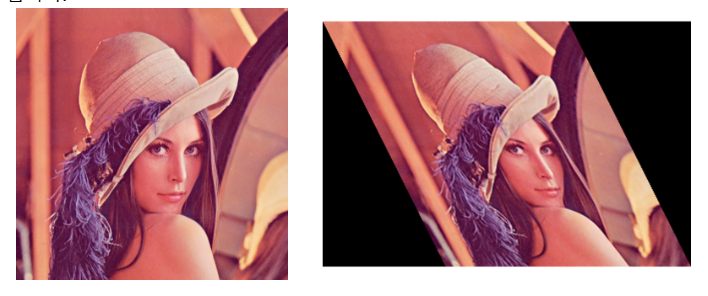

이를 수행하기 위해서는 `transform` 메소드를 사용하면 됩니다. 하지만 이 `transform` 메소드는 전단 변환 뿐만 아니라 본 강의에서 다루지 않는 변환 기술들도 함께 사용할 수 있는 메소드입니다. 먼저 본 메소드의 사용법을 [API 문서](https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.Image.transform)에서 확인하면 아래와 같습니다.

<center><img src="./img/pil_transform.png" width=600px></center>

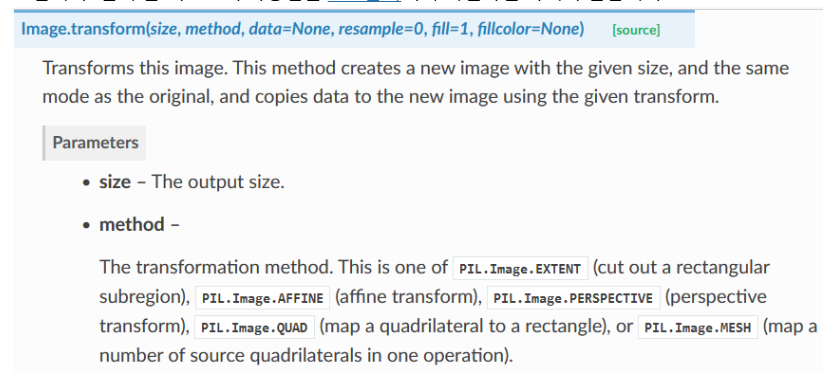

먼저 `transform` 메소드는 출력될 이미지의 크기를 `size` 파라미터에 튜플로 넣을 것을 요구합니다. 그 다음으로 `method`라는 파라미터가 변환의 종류를 지정하는 부분입니다. 전단 변환을 위해서는 아핀 변환(Affine Transform)을 사용해야 하기에 `Image.AFFINE`을 `method`에 지정하면 됩니다. 아핀 변환이 무엇인지 설명하는 것은 본 강의의 주제를 벗어나는 내용이므로 생략하겠습니다. 간단히 전단 변환이 아핀 변환의 특별한 경우라고 이해하셔도 충분합니다.

그 다음으로 `data` 파라미터가 보이는데, 여기에 적절한 값을 넣어줘야 전단 변환이 완성됩니다. 이 또한 구체적으로 설명하기엔 선형 대수학이 필요하여 너무 복잡하기 때문에 먼저 아래 코드들을 실행하여 결과를 확인해보겠습니다.

In [ ]:
imshow(img.transform((int(img.size[0] * 1.5), img.size[1]), Image.AFFINE, (1, -0.5, 0, 0, 1, 0)))

In [ ]:
imshow(img.transform((int(img.size[0] * 1.2), img.size[1]), Image.AFFINE, (1, -0.2, 0, 0, 1, 0)))

보시면 두 코드의 다른 점은 첫번째 파라미터(`size`)와 세번째 파라미터(`data`)의 한 부분입니다. 첫번째 코드는 각각 `1.5`와 `-0.5`로 지정하였고, 두번째 코드는 각각 `1.2`와 `-0.2`로 지정하였습니다. 이에 따라 **전단 변환의 정도**, 쉽게 말해 **평행사변형의 기울기**가 변화한 것을 확인할 수 있습니다. 실제로 이 정도를 조절하는 것은 `data` 파라미터 쪽의 `-0.5`나 `-0.2`에 해당하는 값이고 `size` 파라미터의 값은 출력 크기를 맞춰주기 위한 장치일 뿐입니다.

## 4. 이미지 색상 변환

다음으로 알아볼 기법은 이미지의 색상을 변화시키는 기법들입니다. 대표적으로 이미지의 **밝기(Brightness)** 변화, **대조(Contrast)** 변화, **흑백(Grayscale)** 변화 등이 있습니다.

흑백 변화를 제외한 밝기와 대조 변화를 위해선 새로운 모듈이 필요합니다. Pillow의 `ImageEnhance`라는 모듈이 그것으로 먼저 아래와 같이 불러오도록 하겠습니다.

In [ ]:
from PIL import ImageEnhance

이 `ImageEnhance` 모듈은 사용법이 다소 독특합니다. 예제를 통해 사용법을 알아보도록 하겠습니다.

### 4-1. 밝기 변화

밝기 변화를 위해선 `ImageEnhance` 모듈의 `Brightness` 클래스를 불러와야 합니다. 이 클래스는 객체 생성을 위해 `Image` 객체를 파라미터로 요구합니다. 즉 여기서는 레나 이미지를 저장하고 있는 `img` 변수가 들어가게 됩니다. 이 클래스를 통해 생성된 객체는 공식 명칭이 따로 있는 것은 아니나 여기서는 **Enhancer** 라는 이름으로 부르겠습니다.

In [ ]:
bright_enhancer = ImageEnhance.Brightness(img)

위 코드를 실행하면 `img` 객체에 밝기 조절을 수행하는 새로운 Enhancer 객체가 만들어지게 됩니다. 이 Enhancer 객체는 `enhance`라는 이름의 메소드를 하나 가지고 있습니다. 이 메소드에 밝기 조절을 얼만큼 할지에 대한 배수를 넣어주면 됩니다. 아래 코드는 이미지의 밝기를 두배로 만들어주는 예제입니다.

In [ ]:
imshow(bright_enhancer.enhance(2))

반대로 두배로 어둡게, 즉 0.5배로 밝게 만들어주는 예제는 아래와 같습니다.

In [ ]:
imshow(bright_enhancer.enhance(0.5))

### 4-2. 대조 변화

대조 변화는 `ImageEnhance` 모듈에서 `Contrast` 클래스를 사용한다는 점을 제외하고 사용법은 모두 밝기 변화와 동일합니다. 바로 예제를 통해 확인해보도록 하겠습니다.

아래 코드는 대조 변화 Enhancer 객체를 생성하고 이미지의 대조를 2배 강하게 만드는 예제입니다.

In [ ]:
contrast_enhancer = ImageEnhance.Contrast(img)
imshow(contrast_enhancer.enhance(2))

아래는 반대로 대조를 2배 약하게 만드는 예제입니다.

In [ ]:
imshow(contrast_enhancer.enhance(0.5))

### 4-3. 흑백 변화

흑백 변화는 말 그대로 컬러 이미지를 흑백 이미지로 변화시키는 작업입니다. 초반에 이미지의 컬러 여부를 `mode` 속성을 통해 확인할 수 있다고 하였는데, 이를 RGB에서 흑백 모드로 바꾸는 작업이라 보시면 됩니다.

Pillow에서는 굉장히 간단하게 컬러 이미지를 흑백 이미지로 전환할 수 있습니다. `Image` 클래스의 `convert` 메소드를 사용하면 되며, 이 메소드에는 이미지를 바꿀 모드를 문자열로 넣어주면 됩니다. 이 모드들은 [API 문서](https://pillow.readthedocs.io/en/stable/handbook/concepts.html#modes)에 아래와 같이 정의되어 있습니다.

<center><img src="./img/pil_image_mode.png" width=600px></center>

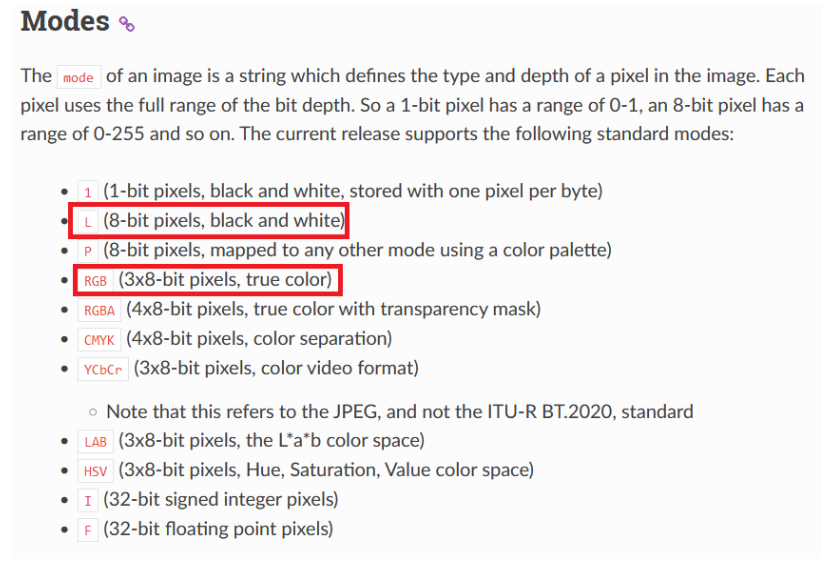

생각보다 다양한 모드들이 있다는 것을 알 수 있습니다. 우리는 RGB 이미지를 흑백 이미지로 바꾸는 것에 관심이 있으므로 `"RGB"` 모드와 `"L"` 모드에만 집중하도록 하겠습니다. 이 `"L"` 모드가 바로 흑백 사진 모드입니다. 이를 `convert` 메소드에 적용하여 흑백 사진으로 바꾸는 코드는 아래와 같습니다. `cmap`과 같은 부분은 `imshow`의 동작을 조절하기 위한 것으로 따로 신경쓰지 않으셔도 됩니다.

In [ ]:
import matplotlib.pyplot as plt

img_gray = img.convert("L")
print("흑백 사진 모드:", img_gray.mode)
imshow(img_gray, cmap=plt.get_cmap("gray"))

## 5. 필터 변환

마지막으로 알아볼 변환들은 필터를 사용하는 이미지 변환 기법들입니다. 이 필터라는 것은 쉽게 생각해서 포토샵이나 스마트폰에서 사진 보정을 위해 적용하는 필터와 비슷한 것이라 생각하면 됩니다. 여기서 Pillow를 통해 적용해볼 필터 변환은 **샤프닝(Sharpening), 블러(Blur), 경계선 탐지(Edge Detection)** 입니다.

필터를 사용하는 변환은 모두 `Image` 클래스의 `filter` 메소드를 사용하면 됩니다. 이 `filter` 메소드에 적용할 필터 종류를 파라미터로 넣어줘야 하는데, 이들은 `ImageFilter` 라는 별도의 모듈에 구현되어 있습니다. 아래는 해당 [API 문서](https://pillow.readthedocs.io/en/stable/reference/ImageFilter.html)의 일부입니다.

<center><img src="./img/pil_image_filter.png" width=500px></center>

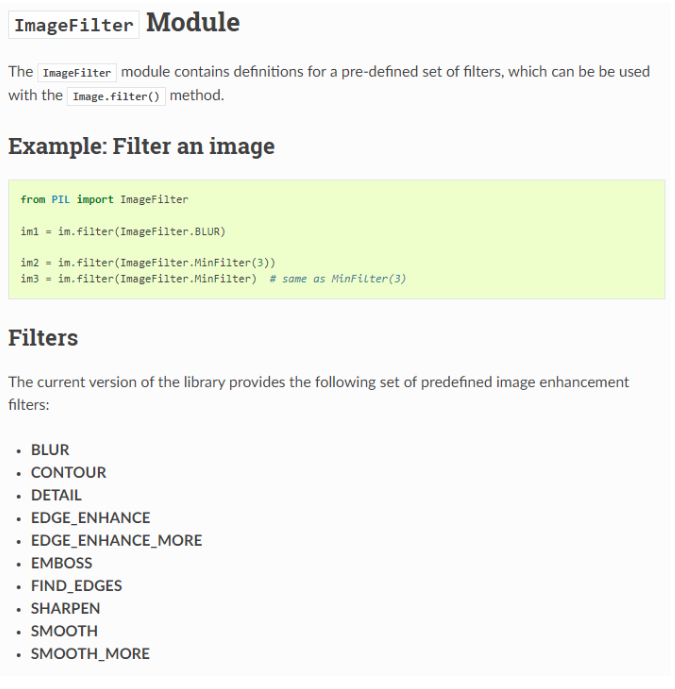

### 5-1. 샤프닝 (Sharpening)

샤프닝은 **이미지의 질감을 날카롭게** 만들어주는 작업입니다. 원본이 흐릿한 이미지였을 경우 어느 정도 화질 개선의 효과를 얻을 수도 있으나, 너무 심하게 적용하면 이미지의 자글자글한 노이즈가 부각되어 보일 수도 있습니다.

Pillow에서는 `ImageFilter` 모듈의 `SHARPEN`을 통해 샤프닝 작업을 수행할 수 있습니다. 이를 `filter` 메소드에 적용하면 된다는 것은 이미 언급하였으므로 아래 예제 코드를 통해 확인해보겠습니다.

In [ ]:
from PIL import ImageFilter

imshow(img.filter(ImageFilter.SHARPEN))

얼핏 봐서는 샤프닝 전과 큰 차이가 없어 보입니다. 효과를 극대화하고자 한다면 `filter` 메소드를 여러 번 사용하는 것도 가능합니다.

In [ ]:
img_sharpen = img.filter(ImageFilter.SHARPEN)
img_sharpen = img_sharpen.filter(ImageFilter.SHARPEN)
img_sharpen = img_sharpen.filter(ImageFilter.SHARPEN)
imshow(img_sharpen)

### 5-2. 블러 (Blur)

블러는 샤프닝과 반대로 이미지를 흐릿하게 만들어주는 작업입니다. 배경에 블러 처리를 하여 사진에 찍힌 대상물을 부각시킨다던가 하는 작업에서 흔히 사용합니다. 요즘 스마트폰에서는 **인물 모드**라 하여 배경에 자동으로 블러를 입혀주는 기능이 꽤나 유명하죠.

Pillow에서 블러 처리는 `ImageFilter`의 `BLUR`를 사용하면 되고, 나머지 사용법은 샤프닝과 동일합니다. `filter` 메소드를 여러번 사용하여 효과를 극대화하는 것 또한 동일하게 사용할 수 있습니다.

In [ ]:
img_blur = img.filter(ImageFilter.BLUR)
img_blur = img_blur.filter(ImageFilter.BLUR)
img_blur = img_blur.filter(ImageFilter.BLUR)
imshow(img_blur)

### 5-3. 경계선 감지

마지막으로 알아볼 필터 변환은 이미지에서 경계선을 찾아주는 작업입니다. 경계선이라 하면 이미지 내에서 **색의 변화가 급격한 선**이라고 볼 수 있습니다.

Pillow에서는 `ImageFilter`의 `FIND_EDGES`를 통해 경계선을 찾아낼 수 있습니다.

In [ ]:
imshow(img.filter(ImageFilter.FIND_EDGES))

결과 이미지를 보면 무언가 기존 이미지가 가지고 있던 인물의 형태만을 따온 것을 확인할 수 있습니다.

---

<span style="color:rgb(120, 120, 120)">본 학습 자료를 포함한 사이트 내 모든 자료의 저작권은 엘리스에 있으며 외부로의 무단 복제, 배포 및 전송을 불허합니다.

Copyright @ elice all rights reserved</span>